# Assignment 1: Predict CPU Efficiency of HPC Cluster Jobs

In a HPC environment, users submit their scripts/programs as jobs to a Job Scheduler. 
Users can request for resources for their scripts/programs, e.g.: Number of CPU cores, Number of GPUs, Amount of Memory (RAM).
The Job Scheduler then dispatches the user's job to remote servers (nodes) when resources are available.

The provided dataset consists of logs of completed/ended jobs. It records the requested resource values as well as actual resource consumption values of each job.

The task for this assignment is to predict the job's CPU utilisation efficiency.
An ideal efficient job should use as close as possible to 100%, however realistically we define efficient CPU utilisation as above 75% of requested CPU cores.

**CPU_EFF = (USED_CPUTIME / USED_WALLTIME) / REQUESTED_NCPUS**


## Data Description

### Columns
'user','dept','queue','Exit_status',
'Resource_List.fluent_lic', 'Resource_List.mem',
'Resource_List.mpiprocs', 'Resource_List.ncpus', 'Resource_List.ngpus',
'Resource_List.nodect', 'Resource_List.walltime', 'cluster', 'ctime', 'datetime', 'end',
'etime', 'exec_host', 'exec_vnode', 'group', 'job_id',
'qtime', 'resources_used.GPU_duration','resources_used.GPU_maxGpuMemoryUsed',
'resources_used.GPU_energyConsumed', 'resources_used.cpupercent',
'resources_used.cput', 'resources_used.mem', 'resources_used.ncpus',
'resources_used.vmem', 'resources_used.walltime',
'run_count', 'start', 'status', 'wait_time', 'gpu0.mem_max', 'gpu0.smUtil_avg',
'gpu0.smUtil_max', 'gpu1.mem_max', 'gpu1.smUtil_avg', 'gpu1.smUtil_max',
'gpu2.mem_max', 'gpu2.smUtil_avg', 'gpu2.smUtil_max', 'gpu3.mem_max',
'gpu3.smUtil_avg', 'gpu3.smUtil_max',


## Load Data

In [2]:
import pandas as pd 
import numpy as np 
cpu = pd.read_csv(r"C:\Users\Aiman\Documents\ST3131\filtered_062019.csv")
cpu.head()

,Unnamed: 0,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,...,gpu0.smUtil_max,gpu1.mem_max,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max
0,0,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA

In [3]:
cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787777 entries, 0 to 787776
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           787777 non-null  int64  
 1   user                                 787777 non-null  object 
 2   dept                                 787777 non-null  object 
 3   queue                                787777 non-null  object 
 4   Exit_status                          787777 non-null  int64  
 5   Resource_List.fluent_lic             787777 non-null  float64
 6   Resource_List.mem                    787777 non-null  float64
 7   Resource_List.mpiprocs               787777 non-null  float64
 8   Resource_List.ncpus                  787777 non-null  int64  
 9   Resource_List.ngpus                  787777 non-null  float64
 10  Resource_List.nodect                 787777 non-null  int64  
 11  Resource_List

In [9]:
cpu.describe()

,Unnamed: 0,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,Resource_List.nodect,Resource_List.walltime,resources_used.GPU_duration,...,gpu1.mem_max,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max,CPU_EFF
count,787777.000000,787777.000000,787777.000000,7.877770e+05,787777.000000,787777.000000,787777.000000,787777.000000,7.877770e+05,787777.000000,...,787777.000000,787777.000000,787777.000000,787777.000000,787777.000000,787777.000000,787777.000000,787777.000000,787777.000000,787776.000000
mean,19693.925002,1.806373,0.000786,2.844699e+07,0.129878,12.447299,0.002153,1.002128,6.782232e+05,23.133382,...,0.003295,0.008043,0.017849,0.002963,0.008511,0.017179,0.001645,0.006596,0.010881,0.105315
std,11370.588791,20.954842,0.028066,1.555680e+07,1.685506,7.733925,0.056898,0.067454,3.035197e+05,1796.698574,...,0.297246,0.724321,1.300990,0.283687,0.773508,1.259771,0.206258,0.699633,1.011393,0.186706
min,0.000000,-1.000000,0.000000,2.621440e+05,0.000000,1.000000,0.000000,1.000000,3.000000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9847.000000,0.000000,0.000000,2.097152e+07,0.000000,8.000000,0.000000,1.000000,6.912000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333
50%,19694.000000,0.000000,0.000000,2.097152e+07,0.000000,8.000000,0.000000,1.000000,8.640000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042857
75%,29541.000000,0.000000,0.000000,4.194304e+07,0.000000,20.000000,0.000000,1.000000,8.640000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333
max,39388.000000,271.000000,2.000000,7.549747e+08,128.000000,96.000000,4.000000,8.000000,2.592000e+06,259308.000000,...,31.700000,98.000000,100.000000,31.680000,97.000000,100.000000,31.700000,97.000000,100.000000,10.786887


In [44]:
## insert CPU ## 
CPU_Efficiency = (used_cputime/used_walltime)/requested_ncpus
cpu['CPU_EFF'] = CPU_Efficiency
cpu.head()

,Unnamed: 0,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,...,gpu1.mem_max,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max,CPU_EFF
3006,3006,d271a8e3a43b63ba4dd3132d2de8c937ffb08adf242828...,LSI,short,1,0.0,26214400.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000
5667,5667,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125
5913,5913,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050
23543,23543,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050
44607,5218,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050


In [45]:
indices = cpu['cluster'].isnull()
#cpu[indices]
cpu = cpu[indices]

In [46]:
## covariance Matrix ## 
correlation_matrix = cpu.corr()
correlation_matrix["CPU_EFF"].sort_values(ascending=False)


CPU_EFF                                1.000000e+00
Exit_status                            1.804108e-01
resources_used.walltime                4.944812e-16
resources_used.cput                    4.944812e-16
Unnamed: 0                            -5.077297e-04
wait_time                             -2.358203e-01
Resource_List.mem                     -5.140645e-01
Resource_List.ncpus                   -6.335397e-01
Resource_List.walltime                -7.864039e-01
Resource_List.fluent_lic                        NaN
Resource_List.mpiprocs                          NaN
Resource_List.ngpus                             NaN
Resource_List.nodect                            NaN
resources_used.GPU_duration                     NaN
resources_used.GPU_maxGpuMemoryUsed             NaN
resources_used.GPU_energyConsumed               NaN
resources_used.cpupercent                       NaN
resources_used.mem                              NaN
resources_used.ncpus                            NaN
resources_us

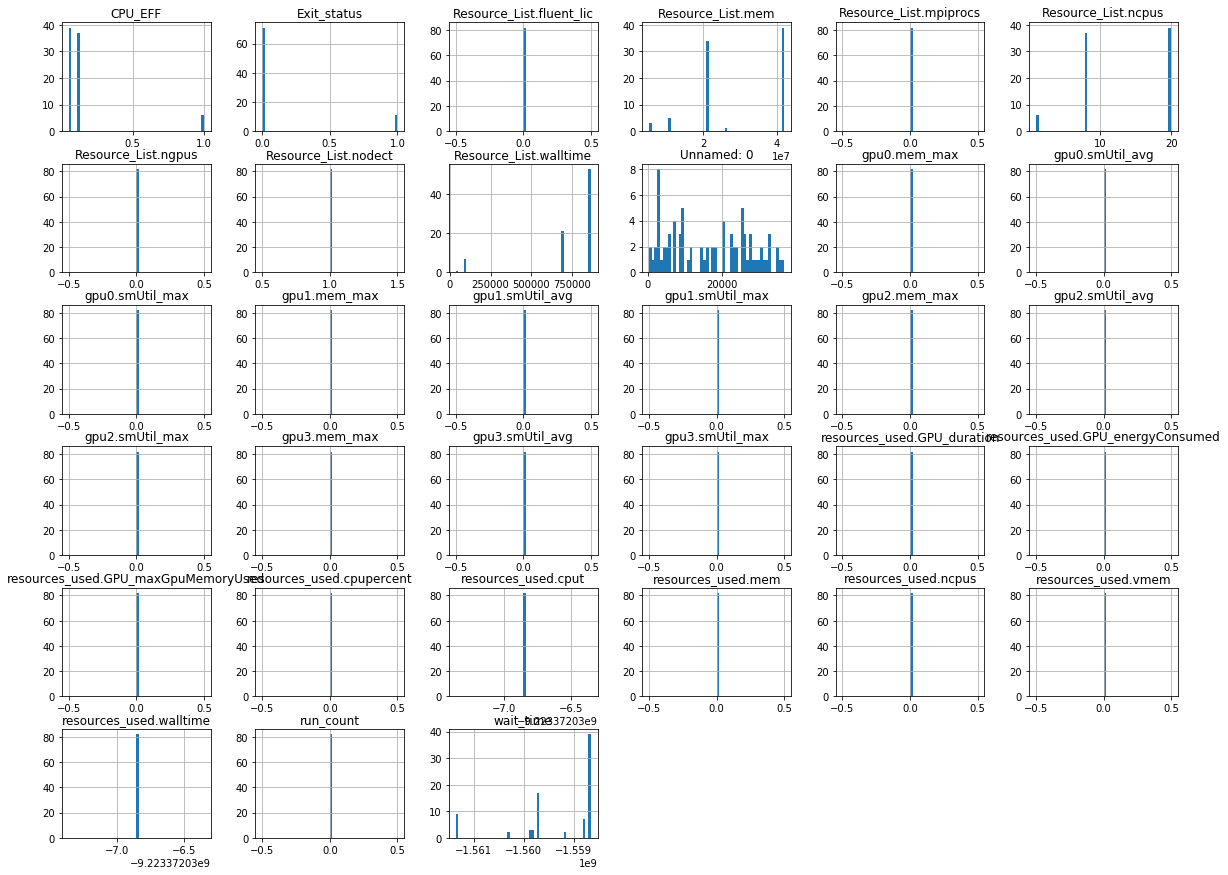

In [47]:
import matplotlib.pyplot as plt
used_walltime = cpu['resources_used.walltime']
used_cputime = cpu['resources_used.cput']
requested_ncpus = cpu['Resource_List.ncpus']
cpu.hist(bins=50, figsize=(20,15))
plt.show()

## Data Preprocessing

In [6]:
cpu = cpu.dropna(axis = 0)

,Unnamed: 0,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,...,gpu0.smUtil_max,gpu1.mem_max,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max
0,0,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
used_walltime = cpu['resources_used.walltime']
used_cputime = cpu['resources_used.cput']
requested_ncpus = cpu['Resource_List.ncpus']
CPU_Efficiency = (used_cputime/used_walltime)/requested_ncpus
cpu['CPU_EFF'] = CPU_Efficiency
cpunone0 = cpu["CPU_EFF"] != 0
cpu = cpu[cpunone0]
cpu.head()

,Unnamed: 0,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,...,gpu1.mem_max,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max,CPU_EFF
0,0,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037500
1,1,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078125
2,2,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333
3,3,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030000
4,4,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069444


In [62]:
cpu["efficiency_cat"] = np.ceil(cpu["CPU_EFF"]/0.1)
cpu["efficiency_cat"].where(cpu["CPU_EFF"] < 0.75,7.5,inplace = True)

In [63]:
cpu

,Unnamed: 0,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,...,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max,CPU_EFF,efficiency_cat
3006,3006,d271a8e3a43b63ba4dd3132d2de8c937ffb08adf242828...,LSI,short,1,0.0,26214400.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,7.5
5667,5667,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,2.0
5913,5913,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
23543,23543,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
44607,5218,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755801,7412,25b4ae8a7711c446cd8f16d51daf6f139badc9706f7244...,LSI,short,0,0.0,10485760.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,7.5
759081,10692,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,2.0
764386,15997,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
781115,32726,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0


In [65]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cpu, cpu["efficiency_cat"]):
    strat_train_set = cpu.iloc[train_index]
    strat_test_set = cpu.iloc[test_index]
    

strat_test_set.head()

,Unnamed: 0,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,...,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max,CPU_EFF,efficiency_cat
278208,2485,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
458534,25255,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
382724,28223,d271a8e3a43b63ba4dd3132d2de8c937ffb08adf242828...,LSI,short,0,0.0,10485760.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,7.5
254220,17886,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,2.0
301275,25552,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,2.0


In [68]:
strat_train_set.columns

Index(['Unnamed: 0', 'user', 'dept', 'queue', 'Exit_status',
       'Resource_List.fluent_lic', 'Resource_List.mem',
       'Resource_List.mpiprocs', 'Resource_List.ncpus', 'Resource_List.ngpus',
       'Resource_List.nodect', 'Resource_List.walltime', 'cluster', 'ctime',
       'datetime', 'end', 'etime', 'exec_host', 'exec_vnode', 'group',
       'job_id', 'qtime', 'resources_used.GPU_duration',
       'resources_used.GPU_maxGpuMemoryUsed',
       'resources_used.GPU_energyConsumed', 'resources_used.cpupercent',
       'resources_used.cput', 'resources_used.mem', 'resources_used.ncpus',
       'resources_used.vmem', 'resources_used.walltime', 'run_count', 'start',
       'status', 'wait_time', 'gpu0.mem_max', 'gpu0.smUtil_avg',
       'gpu0.smUtil_max', 'gpu1.mem_max', 'gpu1.smUtil_avg', 'gpu1.smUtil_max',
       'gpu2.mem_max', 'gpu2.smUtil_avg', 'gpu2.smUtil_max', 'gpu3.mem_max',
       'gpu3.smUtil_avg', 'gpu3.smUtil_max', 'CPU_EFF', 'efficiency_cat'],
      dtype='object')

In [64]:
strat_train_set

,Unnamed: 0,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,...,gpu1.mem_max,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max,CPU_EFF
755801,7412,25b4ae8a7711c446cd8f16d51daf6f139badc9706f7244...,LSI,short,0,0.0,10485760.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000
260230,23896,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050
66776,27387,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050
96696,17918,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050
402986,9096,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,1,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554348,2902,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050
386742,32241,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,1,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050
151279,33112,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125
644662,14438,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050


In [66]:
strat_test_set

,Unnamed: 0,user,dept,queue,Exit_status,Resource_List.fluent_lic,Resource_List.mem,Resource_List.mpiprocs,Resource_List.ncpus,Resource_List.ngpus,...,gpu1.smUtil_avg,gpu1.smUtil_max,gpu2.mem_max,gpu2.smUtil_avg,gpu2.smUtil_max,gpu3.mem_max,gpu3.smUtil_avg,gpu3.smUtil_max,CPU_EFF,efficiency_cat
278208,2485,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
458534,25255,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
382724,28223,d271a8e3a43b63ba4dd3132d2de8c937ffb08adf242828...,LSI,short,0,0.0,10485760.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,7.5
254220,17886,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,2.0
301275,25552,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,2.0
324772,9660,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,2.0
781115,32726,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,0,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
473050,382,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel8,0,0.0,20971520.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,2.0
164517,6961,c4ee464d6b4108a3a3cfc83891b6e535883b01ec678ced...,CEE,parallel20,1,0.0,41943040.0,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050,1.0
554310,2864,d271a8e3a43b63ba4dd3132d2de8c937ffb08adf242828...,LSI,parallel8,0,0.0,5242880.0,0.0,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,2.0


In [ ]:
strat_train_set.drop(["efficiency_cat"], axis=1, inplace=True)
strat_test_set.drop(["efficiency_cat"], axis=1, inplace=True)
strat_train_set.head()
strat_test_set.head()

## Feature Selection/Engineering

In [88]:
temp = strat_train_set[["CPU_EFF","Exit_status","resources_used.walltime","resources_used.cput","wait_time","Resource_List.mem",
           "Resource_List.ncpus","Resource_List.walltime"]]
temp.describe()

,CPU_EFF,Exit_status,resources_used.walltime,resources_used.cput,wait_time,Resource_List.mem,Resource_List.ncpus,Resource_List.walltime
count,65.000000,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,65.000000,65.000000
mean,0.156538,0.138462,-9.223372e+09,-9.223372e+09,-1.559321e+09,2.992475e+07,13.184615,731630.769231
std,0.248050,0.348072,5.766576e-06,5.766576e-06,8.771575e+05,1.210991e+07,6.802785,240836.005486
min,0.050000,0.000000,-9.223372e+09,-9.223372e+09,-1.561365e+09,5.242880e+06,1.000000,36000.000000
25%,0.050000,0.000000,-9.223372e+09,-9.223372e+09,-1.559691e+09,2.097152e+07,8.000000,691200.000000
50%,0.125000,0.000000,-9.223372e+09,-9.223372e+09,-1.558795e+09,2.097152e+07,8.000000,864000.000000
75%,0.125000,0.000000,-9.223372e+09,-9.223372e+09,-1.558655e+09,4.194304e+07,20.000000,864000.000000
max,1.000000,1.000000,-9.223372e+09,-9.223372e+09,-1.558654e+09,4.194304e+07,20.000000,864000.000000


## Model Development

In [89]:
## Linear Regression 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
data1 = temp.drop("CPU_EFF",axis = 1)
data_labels = strat_train_set["CPU_EFF"].copy()
lin_reg.fit(data1, data_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
print(lin_reg.predict(data1[:10]))
print(data_labels[:10])

[ 0.7944983  -0.02206609  0.07095945  0.07095419  0.11961255  0.07099312
 -0.02205333  0.11968182  0.22117149 -0.02208713]
755801    1.000
260230    0.050
66776     0.050
96696     0.050
402986    0.125
23543     0.050
474931    0.050
402913    0.125
711871    0.125
516319    0.050
Name: CPU_EFF, dtype: float64


In [94]:
## RMSE ## 
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(data1, data_labels)
predictions = lin_reg.predict(data1)

# mean_square_error(actual value, predicted value)
lin_mse = mean_squared_error(data_labels,predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %f" % (lin_rmse))

RMSE: 0.097419


In [92]:
## Decision Tree Regressor ## 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data1,data_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [93]:
cpu_efficiency_predictions = tree_reg.predict(data1)
tree_mse = mean_squared_error(data_labels,cpu_efficiency_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.4375920766284033e-17

In [95]:
## Using Multi Trees ## 
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(data1,data_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [96]:
cpu_efficiency_predictions = forest_reg.predict(data1)
forest_mse = mean_squared_error(data_labels,cpu_efficiency_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.4375920766284033e-17

## Evaluation

Evaluate your model's performance using relevant metrics

In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,data1,data_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [1.17288714e-17 1.11269844e-17 1.11269844e-17 1.11269844e-17
 1.04906215e-17 1.20185168e-17 1.47196168e-17 1.13311663e-17
 1.47196168e-17 1.13311663e-17]
Mean: 1.1972052914530523e-17
Standard deviation: 1.4254137427607307e-18


In [100]:
lin_scores = cross_val_score(lin_reg,data1,data_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.10215553 0.07642891 0.18009782 0.07282235 0.0534252  0.31938147
 0.13687968 0.22753874 0.05343407 0.10736497]
Mean: 0.13295287221918467
Standard deviation: 0.0818547014867712


In [101]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg,data1,data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.30718914e-02 3.70899480e-18 1.04582503e-01 3.70899480e-18
 5.24531076e-18 5.05181486e-02 4.90653893e-18 7.14434508e-02
 4.90653893e-18 5.66558315e-18]
Mean: 0.025961599409033514
Standard deviation: 0.035982570171193586


In [ ]:
# Fine Tuning the model ##

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data1,data_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [103]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [104]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [109]:
from sklearn.linear_model import RidgeClassifier

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
lin_reg.get_params().keys()
ridge=RidgeClassifier()
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

grid.fit(data1,data_labels)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


ValueError: Unknown label type: (array([1.   , 0.05 , 0.05 , 0.05 , 0.125, 0.05 , 0.05 , 0.125, 0.125,
       0.05 , 0.05 , 0.125, 0.125, 0.125, 0.05 , 0.125, 0.125, 0.05 ,
       1.   , 0.125, 0.125, 0.05 , 0.05 , 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.05 , 0.05 , 0.05 , 0.125, 0.125, 0.05 , 0.05 ,
       0.125, 1.   , 0.125, 0.125, 0.05 , 0.05 , 0.125, 0.05 , 1.   ,
       0.05 , 0.125, 0.125, 0.05 , 0.05 , 0.05 , 0.125, 0.05 , 0.125,
       0.05 , 0.05 , 0.125, 0.125, 0.05 , 1.   , 0.05 , 0.05 , 0.125,
       0.05 , 0.05 ]),)

In [106]:
ridge.get_params().keys()

dict_keys(['alpha', 'class_weight', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [107]:
grid.best_estimator_

RidgeClassifier(alpha=0.001, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [108]:
grid.best_score_

nan

In [113]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)
forest_reg.fit(data1,data_labels)

cpu_predictions = forest_reg.predict(data1)
forest_mse = mean_squared_error(data_labels,cpu_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.01617875572323585

In [114]:
forest_scores = cross_val_score(forest_reg,data1,data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.30718914e-02 1.85449740e-17 8.88780375e-02 1.85449740e-17
 2.09812430e-17 9.59992525e-02 1.19072418e-02 5.95362090e-02
 1.96261557e-17 3.57217254e-02]
Mean: 0.03251143576719672
Standard deviation: 0.03549839678048956
